# Universities Established in Pakistan 

## Visualization

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("All the Universities of Pakistan.csv")
df.head()

,University,Location,Province,Established,Campuses,Specialization,Type
0,Riphah International University,Islamabad,Federal Capital Territory,2002,"Faisalabad,Lahore,Malakand",General,Private
1,Capital University of Science & Technology,Islamabad,Federal Capital Territory,1998,NaN,General,Private
2,Quaid-i-Azam University,Islamabad,Federal Capital Territory,1967,NaN,General,Public
3,Pakistan Institute of Engineering and Applied ...,Islamabad,Federal Capital Territory,1967,NaN,General,Public
4,"National Defence University, Pakistan",Islamabad,Federal Capital Territory,1970,NaN,General,Public


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   University      227 non-null    object
 1   Location        227 non-null    object
 2   Province        227 non-null    object
 3   Established     227 non-null    int64 
 4   Campuses        64 non-null     object
 5   Specialization  227 non-null    object
 6   Type            227 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.5+ KB


In [5]:
df.isnull().sum()

University          0
Location            0
Province            0
Established         0
Campuses          163
Specialization      0
Type                0
dtype: int64

In [6]:
df['Location'].unique()

array(['Islamabad', 'Quetta', 'Khuzdar', 'Lasbela', 'Turbat', 'Loralai',
       'Sibi', 'Gwadar', 'Peshawar', 'Abbotabad', 'Risalpur',
       'Dera Ismail Khan', 'Kohat', 'Swabi', 'Chakdara', 'Mansehra',
       'Nowshera', 'Bannu', 'Mardan', 'Upper Dir', 'Swat', 'Charsadda',
       'Haripur', 'Karak', 'Buner', 'Abbottabad', 'Akhorwal', 'Chitral',
       'Lakki Marwat', 'Timergara', 'Lahore', 'Faisalabad', 'Mianwali',
       'Rawalpindi', 'Multan', 'Bahawalpur', 'Taxila', 'Sargodha',
       'Gujranwala', 'Gujrat', 'Wah', 'Sialkot', 'Dera Ghazi Khan',
       'Rahim Yar Khan', 'Mandi Bahauddin', 'Sahiwal', 'Okara', 'Jhang',
       'Narowal', 'Sohawa', 'Nankana Sahib', 'Chakwal', 'Bhakkar',
       'Murree', 'Jamshoro', 'Karachi', 'Khairpur', 'Benazirabad',
       'Tandojam', 'Sukkur', 'Hyderabad', 'Larkana', 'Bhit Shah',
       'Shikarpur', 'Mirpur', 'Muzaffarabad', 'Rawalakot',
       'Nerian Sharif', 'Bagh', 'Kotli', 'Gilgit', 'Skardu'], dtype=object)

In [9]:
df.Type.unique()

array(['Private', 'Public', 'Military'], dtype=object)

In [10]:
df.Specialization.unique()

array(['General', 'Medical', 'Engineering and Technology',
       'Agriculture and Veterinary', 'Arts and Design', 'Sufism'],
      dtype=object)

In [11]:
df.Province.unique()

array(['Federal Capital Territory', 'Balochistan', 'Khyber Pakhtunkhwa',
       'Punjab', 'Sindh', 'Azad Jammu and Kashmir', 'Gilgit-Baltistan'],
      dtype=object)

In [23]:
df_Prov = df['Province'].value_counts().reset_index()

### By Province

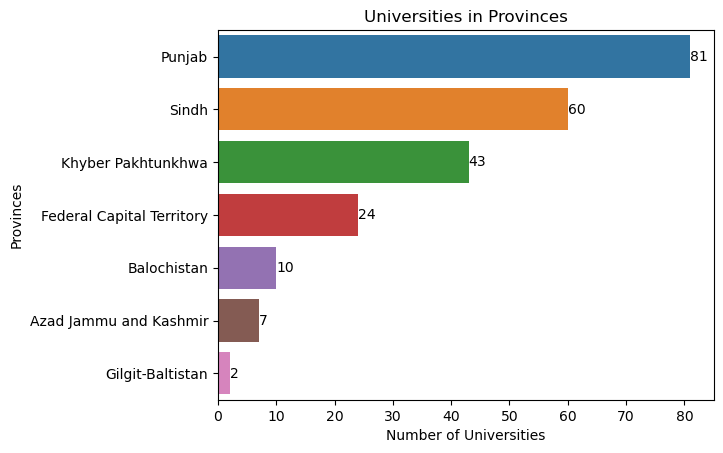

In [36]:
ax = sns.barplot(data=df_Prov, y='index', x='Province')
plt.title('Universities in Provinces')
plt.ylabel('Provinces')
plt.xlabel('Number of Universities')
ax.bar_label(container=ax.containers[0],labels=df_Prov['Province'])
plt.show()


### By Cities

In [39]:
df_loc = df['Location'].value_counts().reset_index()
df_loc.head()

,index,Location
0,Karachi,40
1,Lahore,35
2,Islamabad,24
3,Peshawar,14
4,Multan,7


In [62]:
df_loc[(df_loc['Location'] < 10) & (df_loc['Location'] > 5)]

,index,Location
4,Multan,7
5,Faisalabad,6
6,Rawalpindi,6


In [66]:
df_loc = df_loc[(df_loc['Location'] > 5) ]

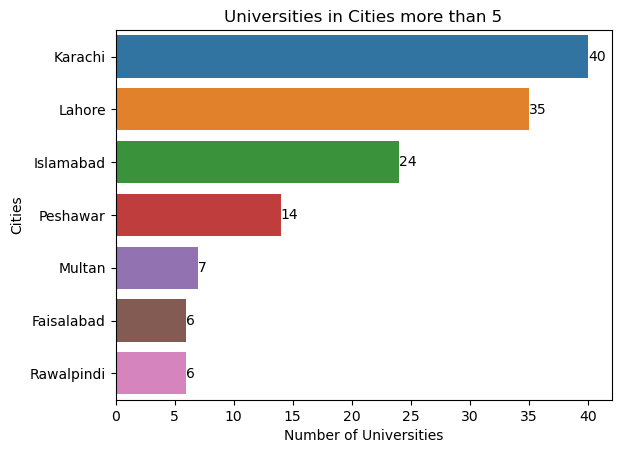

In [69]:
ax = sns.barplot(data=df_loc, y='index', x='Location')
plt.title('Universities in Cities more than 5')
plt.ylabel('Cities')
plt.xlabel('Number of Universities')
ax.bar_label(container=ax.containers[0],labels=df_loc['Location'])
plt.show()


### By Type

In [71]:
df_type =  df['Type'].value_counts().reset_index()
df_type

,index,Type
0,Public,146
1,Private,78
2,Military,3


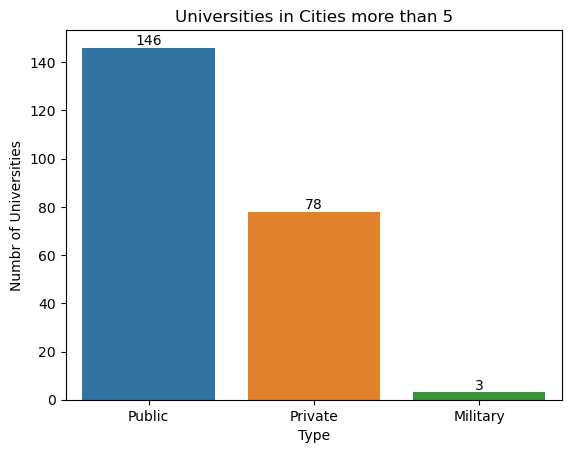

In [75]:
ax = sns.barplot(data=df_type, x='index', y='Type')
plt.title('Universities in Cities more than 5')
plt.ylabel('Numbr of Universities')
plt.xlabel('Type')
ax.bar_label(container=ax.containers[0],labels=df_type['Type'])
plt.show()

<AxesSubplot:ylabel='Type'>

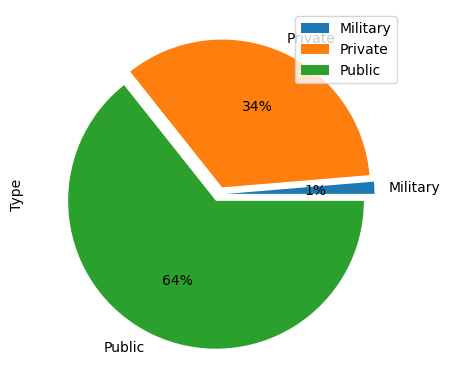

In [86]:
df_type.groupby(['index']).sum().plot(kind='pie', autopct='%1.0f%%', y='Type', explode=(0.05, 0.05, 0.05))

### By Years

In [130]:
df_est = df['Established'].value_counts().reset_index().sort_values(by='index')
df_est

,index,Established
63,1860,1
38,1864,2
53,1873,1
62,1875,1
48,1881,1
...,...,...
32,2018,3
31,2019,3
13,2020,4
7,2021,7


In [131]:
df_est = df_est.rename(columns={'index' : 'Year'})

In [132]:
df_est.dtypes

Year           int64
Established    int64
dtype: object

In [138]:
df_est['Year'] = pd.to_datetime(df_est['Year'], format="%Y")

df_est.dtypes

Year           datetime64[ns]
Established             int64
dtype: object

In [139]:
df_est.head()

,Year,Established
63,1860-01-01,1
38,1864-01-01,2
53,1873-01-01,1
62,1875-01-01,1
48,1881-01-01,1


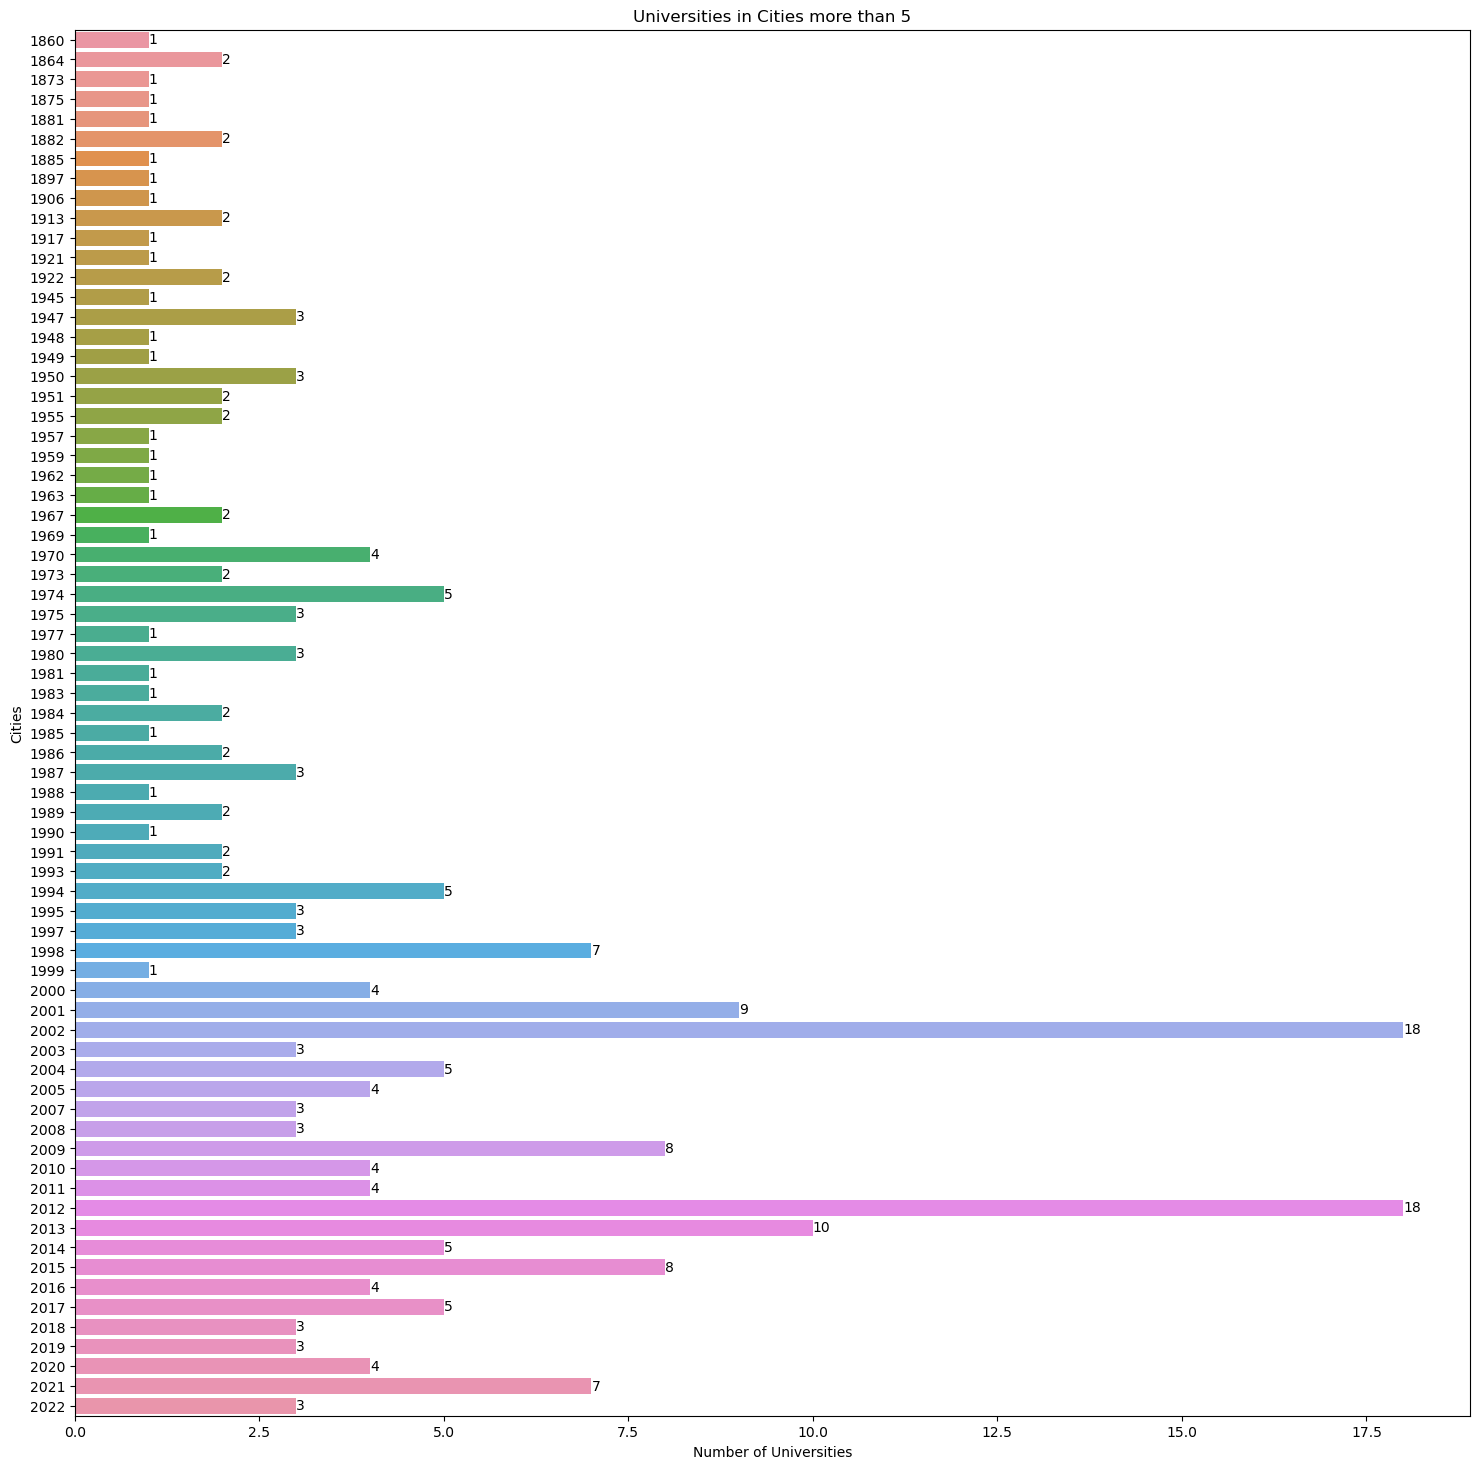

In [146]:
plt.figure(figsize=(18,18))
ax = sns.barplot(data=df_est, y=df_est['Year'].dt.strftime('%Y'), x='Established')
plt.title('Universities in Cities more than 5')
plt.ylabel('Cities')
plt.xlabel('Number of Universities')
ax.bar_label(container=ax.containers[0],labels=df_est['Established'])
plt.show()


### By Eras

In [181]:
df_bins = pd.DataFrame(columns=['UniCount', 'Duration'])

In [182]:
df_bins.dtypes

UniCount    object
Duration    object
dtype: object

In [183]:
pre_par = {'UniCount':df[df.Established < 1947]['University'].count(), 'Duration':'Pre Partition (1860-1947)'}
till_1958 = {'UniCount':df[(df.Established >= 1947) & (df.Established < 1959)]['University'].count(), 'Duration':'1947-1958'}
FirstMLaw = {'UniCount':df[(df.Established >= 1958) & (df.Established < 1971)]['University'].count(), 'Duration':'Ayub (1958-1971)'}
Bhuttos = {'UniCount':df[(df.Established >= 1971) & (df.Established < 1977)]['University'].count(), 'Duration':'Bhutto (1971-1977)'}
SecondMLaw = {'UniCount':df[(df.Established >= 1977) & (df.Established < 1988)]['University'].count(), 'Duration':'Zia (1977-1988)'}
CivilGovt90s = {'UniCount':df[(df.Established >= 1988) & (df.Established < 1999)]['University'].count(), 'Duration':'PPP,PML (1988-1999)'}
ThirdMLaw = {'UniCount':df[(df.Established >= 1999) & (df.Established < 2008)]['University'].count(), 'Duration':'Musharaf (1999-2008)'}
PPP = {'UniCount':df[(df.Established >= 2008) & (df.Established < 2013)]['University'].count(), 'Duration':'PPP (2008-2013)'}
PMLN = {'UniCount':df[(df.Established >= 2013) & (df.Established < 2018)]['University'].count(), 'Duration':'PMLN (2013-2018)'}
PTI = {'UniCount':df[(df.Established >= 2018) & (df.Established < 2023)]['University'].count(), 'Duration':'PTI (2018-2022)'}


df_bins= df_bins.append(pre_par, ignore_index=True)
df_bins= df_bins.append(till_1958, ignore_index=True)
df_bins= df_bins.append(FirstMLaw, ignore_index=True)
df_bins= df_bins.append(Bhuttos, ignore_index=True)
df_bins= df_bins.append(SecondMLaw, ignore_index=True)
df_bins= df_bins.append(CivilGovt90s, ignore_index=True)
df_bins= df_bins.append(ThirdMLaw, ignore_index=True)
df_bins= df_bins.append(PPP, ignore_index=True)
df_bins= df_bins.append(PMLN, ignore_index=True)
df_bins= df_bins.append(PTI, ignore_index=True)


#df_bins['unis'] = df[df.Established < 1947]['University'].count()
#df_bins['duration'] = df[df.Established < 1947]['University'].count()
df_bins

C:\Users\sajids\AppData\Local\Temp\ipykernel_26780\2215603544.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bins= df_bins.append(pre_par, ignore_index=True)
C:\Users\sajids\AppData\Local\Temp\ipykernel_26780\2215603544.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bins= df_bins.append(till_1958, ignore_index=True)
C:\Users\sajids\AppData\Local\Temp\ipykernel_26780\2215603544.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bins= df_bins.append(FirstMLaw, ignore_index=True)
C:\Users\sajids\AppData\Local\Temp\ipykernel_26780\2215603544.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bins= df_bins.append(

,UniCount,Duration
0,18,Pre Partition (1860-1947)
1,13,1947-1958
2,10,Ayub (1958-1971)
3,10,Bhutto (1971-1977)
4,14,Zia (1977-1988)
5,26,"PPP,PML (1988-1999)"
6,47,Musharaf (1999-2008)
7,37,PPP (2008-2013)
8,32,PMLN (2013-2018)
9,20,PTI (2018-2022)


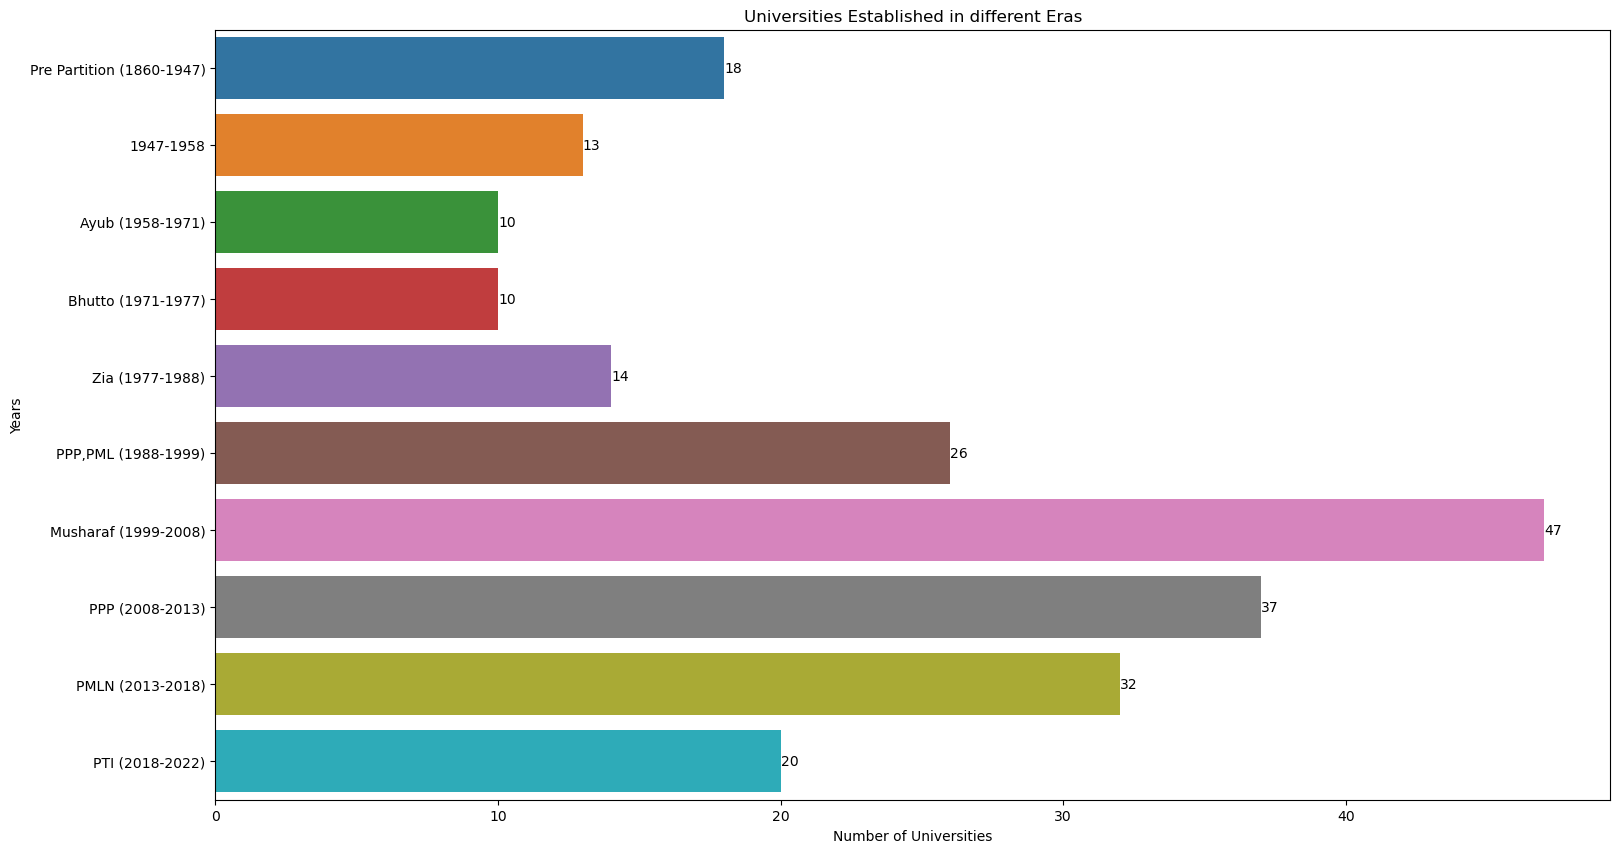

In [184]:
plt.figure(figsize=(18,10))
ax = sns.barplot(data=df_bins, y=df_bins['Duration'], x='UniCount')
plt.title('Universities Established in different Eras')
plt.ylabel('Years')
plt.xlabel('Number of Universities')
ax.bar_label(container=ax.containers[0],labels=df_bins['UniCount'])
plt.show()